In [4]:
# Importing filterwarnings to ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Reading the bikes rental  dataset into 'bikes' dataframe
bikes=pd.read_csv("day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# looking at the shape of the bikes dataset
bikes.shape

(730, 16)

In [8]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
#Finding out the datatype of the columns in the bikes dataset:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### In our bikes dataset , we have the following types of columns

- Categorical columns: <span style="color:blue">season , month , weathersit , weekday</span>
- Continuous/Numerical columns : <span style="color:blue">windspeed , hum , temp , atemp , count</span>
- Binary/Dichotomous columns: <span style="color:blue">yr , holiday , workingday</span>

#### In our bikes dataset,we have some unnecessary columns like: <span style="color:blue">instant , dteday , casual , registered </span>, so we are going to drop these columns.

In [10]:
# Dropping the columns : instant,dteday,casual,registered

cols=["instant","dteday","casual","registered"]

bikes=bikes.drop(columns=cols,axis=1)

##### Renaming columns :

In [11]:
# Renaming some columns for more clearity 

bikes.rename(columns={'hum':'humidity','cnt':'count','mnth':'month','yr':'year'},inplace=True)

### Mapping the Categorical columns to their actual category names :

1 . Season column mapping as:
 - 1: spring
 - 2: summer
 - 3: fall
 - 4: winter

In [12]:
# Mapping the categorical column : season into its categories

season_cat={1:"spring",2:"summer",3:"fall",4:'winter'}

bikes.season=[season_cat[item] for item in bikes.season]

2 . Weathersit column mapping as:

 - 1: clear
 - 2: mist & cloudy
 - 3: light rain & snow
 - 4: heavy rain & snow

In [13]:
# Mapping the categorical column : weathersit into its categories

weather_cat={1:"clear",2:"mist & cloudy",3:"light rain & snow",4:'heavy rain & snow'}

bikes.weathersit=[weather_cat[item] for item in bikes.weathersit]


3 . Month column mapping as:

 - 1: Jan , 2: Feb , 3: Mar , 4: Apr , 5: May , 6: Jun , 7: Jul , 8: Aug , 9: Sep , 10: Oct , 11: Nov , 12: Dec

In [14]:
# Mapping the categorical column : month into its categories

month_cat={1: 'Jan' , 2: 'Feb' , 3: 'Mar' , 4: 'Apr' , 5: 'May' , 6: 'Jun' , 7: 'Jul' , 8: 'Aug' , 9: 'Sep' , 10: 'Oct' , 11: 'Nov' , 12: 'Dec'}

bikes.month=[month_cat[item] for item in bikes.month]

4.Weekday column mapping as:
    
 - 0: Sunday
 - 1: Monday
 - 2: Tuesday
 - 3: Wednesday
 - 4: Thursday
 - 5: Friday
 - 6: Saturday

In [15]:
# Mapping the categorical column : weekday into its categories

wkday_cat={0: 'Sunday',1: 'Monday',2: 'Tuesday',3: 'Wednesday',4: 'Thursday',5: 'Friday',6: 'Saturday'}

bikes.weekday=[wkday_cat[item] for item in bikes.weekday]

5.Year column mapping as:

 - 0: 2018
 - 1: 2019

In [16]:
# Mapping the categorical column : Year into its categories

yr_cat={0: '2018',1: '2019'}

bikes.year=[yr_cat[item] for item in bikes.year]

### Exploratory Data Analysis :

#### Analysis of various variables w.r.t 'count' ie., target variable through Visualization:

#### 1. Season 

<AxesSubplot:xlabel='season', ylabel='count'>

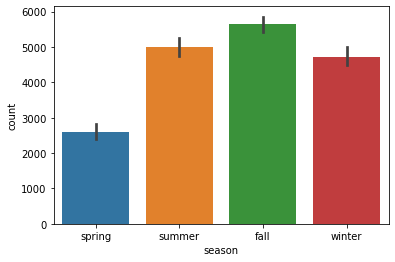

In [17]:
# Analysing the demand in various seasons
sns.barplot(x='season',y='count',data=bikes)

#### Observation: Bikes rented are more during the Fall season

2.Year :
- 0: 2018
- 1: 2019

<AxesSubplot:xlabel='year', ylabel='count'>

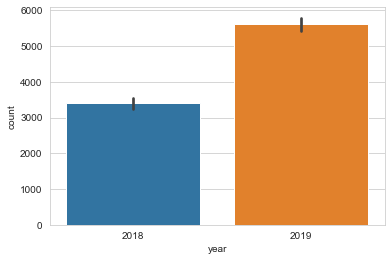

In [18]:
# Analysing the demand in year 2018 and 2019
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.barplot(x='year',y='count',data=bikes)

#### Observation: Bikes rented are more in the year 2019 as compared to 2018.

#### 3. Month :

<AxesSubplot:xlabel='month', ylabel='count'>

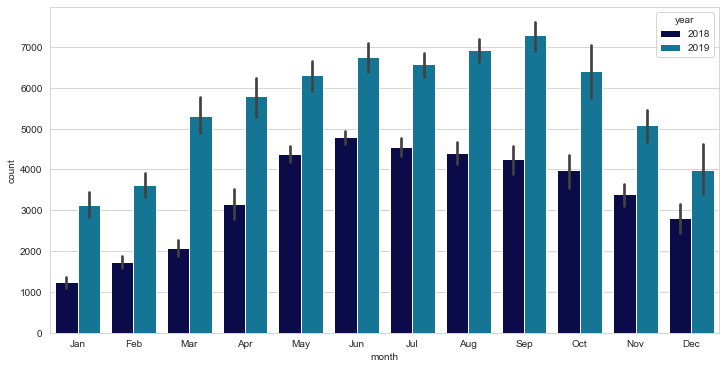

In [19]:
# Analysing the demand in various months
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(x='month',y='count',data=bikes,hue='year',palette='ocean')

#### Observation: Bikes rented are more in the month of Sep 2019.

#### 4. Weather :

<AxesSubplot:xlabel='weathersit', ylabel='count'>

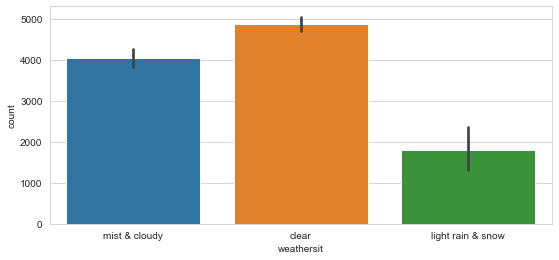

In [20]:
# Analysing the demand in various weathers
sns.set_style('whitegrid')
plt.figure(figsize=(9,4))
sns.barplot(x='weathersit',y='count',data=bikes)

#### Observation: Bikes rented are more in the Clear weather .

#### 5. Weekday :

<AxesSubplot:xlabel='weekday', ylabel='count'>

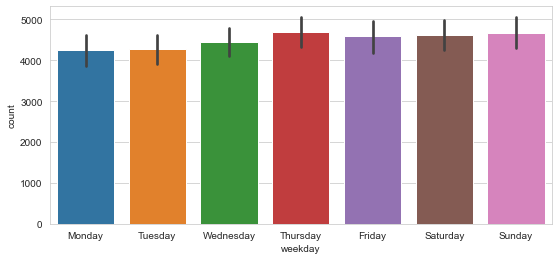

In [21]:
# Analysing the demand in various weekdays
sns.set_style('whitegrid')
plt.figure(figsize=(9,4))
sns.barplot(x='weekday',y='count',data=bikes)

#### Observation: Bikes rented are more on Thursday and Sunday .

6. Working day :
- 0 : holiday or weekend
- 1 : neither holiday nor weekend ie., working day

<AxesSubplot:xlabel='workingday', ylabel='count'>

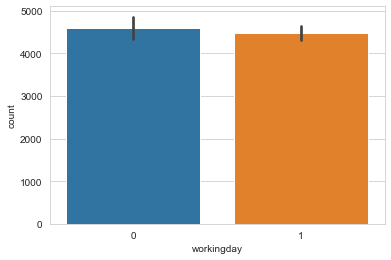

In [22]:
# Analysing the demand based on workingday or not a workingday
sns.set_style('whitegrid')
# plt.figure(figsize=(9,4))
sns.barplot(x='workingday',y='count',data=bikes)

#### Observation: Bikes rented are more on holiday or weekend .

### 7. Visualizing the continuous variables 'temp','atemp','humidity','windspeed' w.r.t 'count ' variable through a pairplot.

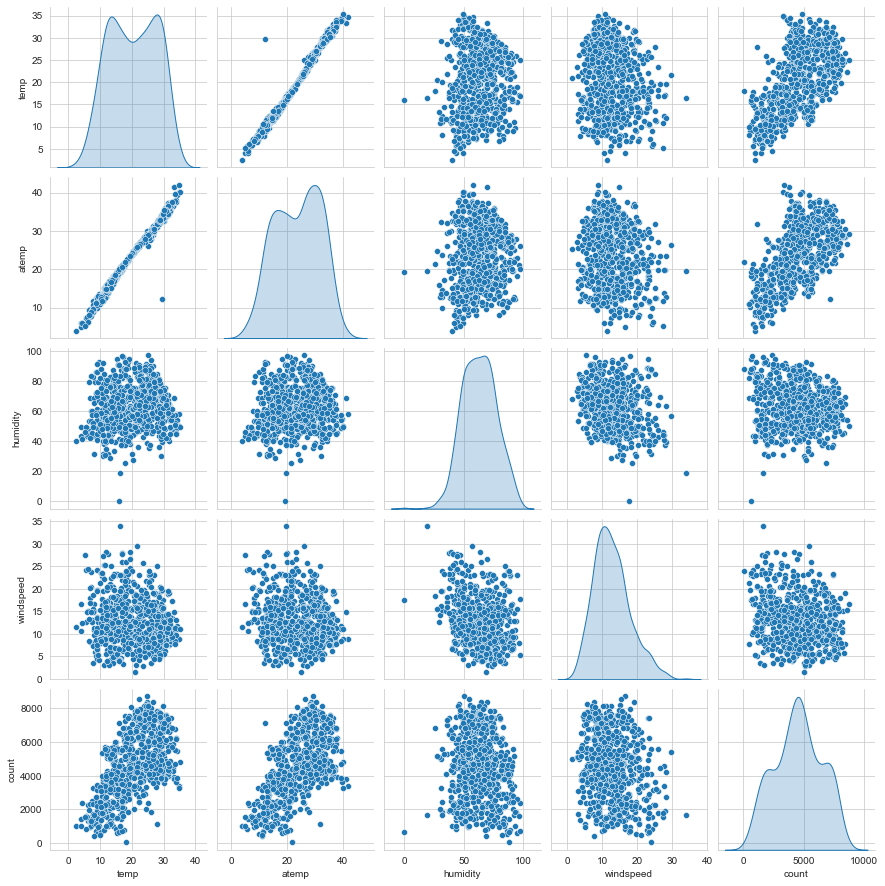

In [23]:
bike_num=bikes[['temp','atemp','humidity','windspeed','count']]
sns.pairplot(bike_num, diag_kind='kde')
plt.show()

#### Observation:
- **Bike rental counts show a `positive correlation` with `temp` and `atemp` and therefore bike rental counts increase at higher temperatures and vice-versa.**

- **Bike rental counts show a `negative correlation` with `humidity` and therefore bike rental counts are less at high humidity levels and vice-versa.**

- **Bike rental counts show a `negative correlation` with `windspeed` and therefore bike rental counts are less at high windspeed and vice-versa.**

#### Checking the Correlations among variables:

<AxesSubplot:>

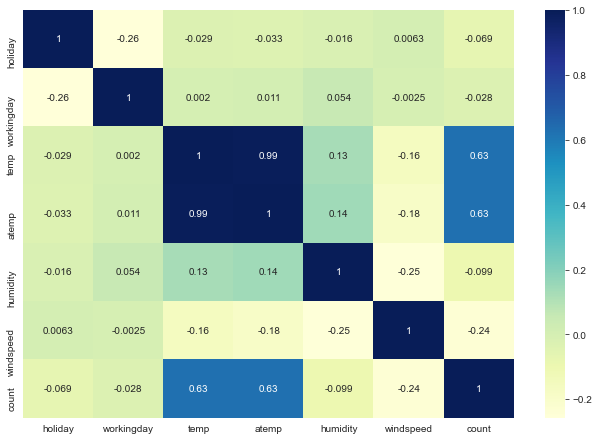

In [24]:
plt.figure(figsize=(11,7.5))
sns.heatmap(bikes.corr(),annot=True,cmap='YlGnBu')

#### Observation : It is seen that the variables 'temp' and 'atemp' have a high correlation value of 0.99 , ie., they are highly correlated to each other , therefore we need to drop one of them 

In [25]:
# Dropping the variable 'atemp' 
bikes=bikes.drop("atemp",axis=1)

### DATA PREPARATION :

#### Creating Dummy Variables for the Categorical variables :

<span style="color:blue">month , season , weathersit , weekday</span>

In [26]:
# Creating the dummy variables for the variables month,season,weathersit,weekday and storing them 
# in new variable 'months',seasons','weather' and 'weekdays' respectively and 
# dropping the first column from these variables using 'drop_first = True'

months= pd.get_dummies(bikes['month'],drop_first=True,prefix='month')

seasons = pd.get_dummies(bikes['season'],drop_first=True,prefix='season')

weather= pd.get_dummies(bikes['weathersit'],drop_first=True,prefix='weather')

weekdays= pd.get_dummies(bikes['weekday'],drop_first=True,prefix='day')

years= pd.get_dummies(bikes['year'],drop_first=True,prefix='year')

In [27]:
# Add the above created dummy variables to the original bikes dataframe
bikes = pd.concat([bikes,months,seasons,weather,weekdays,years], axis = 1)

# Looking at the top rows of our dataframe.
bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,season_winter,weather_light rain & snow,weather_mist & cloudy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,year_2019
0,spring,2018,Jan,0,Monday,1,mist & cloudy,14.110847,80.5833,10.749882,...,0,0,1,1,0,0,0,0,0,0
1,spring,2018,Jan,0,Tuesday,1,mist & cloudy,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,1,0,0
2,spring,2018,Jan,0,Wednesday,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,0,1,0
3,spring,2018,Jan,0,Thursday,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,2018,Jan,0,Friday,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# As we have created dummy variables for the categorical variables , now we will drop those categorical variables .

bikes.drop(['season','weathersit','weekday','month','year'],axis=1,inplace=True)

In [29]:
# Looking at the shape of dataframe after dropping the above variables
bikes.shape

(730, 29)

#### Splitting the Data into Training and Testing Sets

In [30]:
from sklearn.model_selection import train_test_split

bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
#Looking at the shape of the train dataset.
bikes_train.shape

(510, 29)

In [32]:
#Looking at the shape of the test dataset.
bikes_test.shape

(219, 29)

#### Scaling the Features

For Scaling the features in our bikes dataset , we will use `MinMax scaling`.

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [34]:
# Applying Scaling on the continuous columns : 'windspeed' , 'temp' , 'humidity' , 'count'
vars = ['windspeed' , 'temp' , 'humidity','count']

bikes_train[vars] = scaler.fit_transform(bikes_train[vars])

bikes_train.head()

,holiday,workingday,temp,humidity,windspeed,count,month_Aug,month_Dec,month_Feb,month_Jan,...,season_winter,weather_light rain & snow,weather_mist & cloudy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,year_2019
653,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
576,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
426,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
728,0,1,0.245101,0.498067,0.663106,0.204096,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
482,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


#### Dividing into X and Y sets for the model building :

In [35]:
y_train = bikes_train.pop('count')
X_train = bikes_train

### Data Modelling and Evaluation

**We will be using the `Mixed Approach` for model building ie., firstly we will select 15 variables by using the `Automated Approach of RFE` and then using `Manual Approach for removing variables one by one based on the Pvalues and VIF values`.
We will be using the `LinearRegression function from SciKit Learn` for its compatibility with RFE (Recursive Feature Elimination which is a utility from sklearn)**

#### RFE
`Recursive feature elimination`

In [36]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
# Running RFE with selecting 15 variables 
lm = LinearRegression()
lm.fit(X_train, y_train)

np.random.seed(0)
rfe = RFE(lm, 15)             # running RFE,15 is the number of variables we want RFE to select
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))  

# rfe_support_ : tells whether RFE selected the variable or not
# rfe.ranking_ : tells the next best variable to be selected and ranks accordingly , The numbers 
#                 beside the variables indicate the importance of that variable.

[('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('month_Aug', False, 9),
 ('month_Dec', True, 1),
 ('month_Feb', False, 2),
 ('month_Jan', True, 1),
 ('month_Jul', True, 1),
 ('month_Jun', False, 13),
 ('month_Mar', False, 14),
 ('month_May', False, 6),
 ('month_Nov', True, 1),
 ('month_Oct', False, 11),
 ('month_Sep', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weather_light rain & snow', True, 1),
 ('weather_mist & cloudy', True, 1),
 ('day_Monday', False, 8),
 ('day_Saturday', False, 4),
 ('day_Sunday', False, 5),
 ('day_Thursday', False, 12),
 ('day_Tuesday', False, 7),
 ('day_Wednesday', False, 10),
 ('year_2019', True, 1)]

In [39]:
# Looking at the cols that RFE selected
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'humidity', 'windspeed', 'month_Dec', 'month_Jan',
       'month_Jul', 'month_Nov', 'month_Sep', 'season_spring', 'season_summer',
       'season_winter', 'weather_light rain & snow', 'weather_mist & cloudy',
       'year_2019'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [40]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [41]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [42]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

#### Model - 1

In [43]:
#Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.34e-189
Time:                        21:29:41   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.3202      0.036      8.886      0.000       0.249       0.391
holiday                      -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                          0.4800      0.037     12.977      0.000       0.407       0.553
humidity                     -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                    -0.1885      0.026     -7.312      0.000      -0.239      -0.138
month_Dec                    -0.0372      0.017     -2.131      0.034      -0.071      -0.003
month_Jan                    -0.0437      0.018     -2.415      0.016      -0.079      -0.008
month_Jul                    -0.0555      0.018     -3.046      0.002      -0.091      -0.020
month_Nov                    -0.0409      0.019     -2.187      0.029      -0.078      -0.004
month_Sep                     0.0749      0.017      4.438      0.000       0.042       0.108
season_spring                -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer                 0.0408      0.015      2.659      0.008       0.011       0.071
season_winter                 0.1034      0.018      5.763      0.000       0.068       0.139
weather_light rain & snow    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
weather_mist & cloudy        -0.0559      0.010     -5.338      0.000      -0.076      -0.035
year_2019                     0.2303      0.008     28.511      0.000       0.214       0.246
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the above model , according to the pvalues , all the variables are significant. Now we will have a look at the VIF of the variables to find if any multicollinearity exists betweeen any variable.

#### VIF (Variable Inflation Factor) Calculation

In [44]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.48
10,season_spring,5.27
2,temp,4.42
12,season_winter,3.83
11,season_summer,2.76
3,humidity,1.93
8,month_Nov,1.76
6,month_Jan,1.68
14,weather_mist & cloudy,1.57
5,month_Dec,1.49


We see that the VIF value for the 'const' is very high , so we will drop the const.

In [45]:
# Dropping the const variable
X_train_new = X_train_rfe.drop(["const"], axis = 1)

Rebuilding the model without const

#### Model - 2

In [46]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.34e-189
Time:                        21:29:42   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.3202      0.036      8.886      0.000       0.249       0.391
holiday                      -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                          0.4800      0.037     12.977      0.000       0.407       0.553
humidity                     -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                    -0.1885      0.026     -7.312      0.000      -0.239      -0.138
month_Dec                    -0.0372      0.017     -2.131      0.034      -0.071      -0.003
month_Jan                    -0.0437      0.018     -2.415      0.016      -0.079      -0.008
month_Jul                    -0.0555      0.018     -3.046      0.002      -0.091      -0.020
month_Nov                    -0.0409      0.019     -2.187      0.029      -0.078      -0.004
month_Sep                     0.0749      0.017      4.438      0.000       0.042       0.108
season_spring                -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer                 0.0408      0.015      2.659      0.008       0.011       0.071
season_winter                 0.1034      0.018      5.763      0.000       0.068       0.139
weather_light rain & snow    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
weather_mist & cloudy        -0.0559      0.010     -5.338      0.000      -0.076      -0.035
year_2019                     0.2303      0.008     28.511      0.000       0.214       0.246
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the above model , according to the pvalues , all the variables are significant. Now we will have a look at the VIF of the variables to find if any multicollinearity exists betweeen any variable.

Checking for VIFs again

In [47]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,humidity,30.94
1,temp,17.80
3,windspeed,4.72
9,season_spring,4.37
11,season_winter,4.06
10,season_summer,2.81
13,weather_mist & cloudy,2.32
14,year_2019,2.09
7,month_Nov,1.83
5,month_Jan,1.75


We see that the VIF value for the variable `humidity` is very high so we are going to drop humidity variable.

In [48]:
# Dropping the 'humidity' variable
X_train_new = X_train_new.drop(["humidity"], axis = 1)

Rebuilding the model without humidity

#### Model - 3

In [49]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.57e-186
Time:                        21:29:43   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2466      0.032      7.679      0.000       0.184       0.310
holiday                      -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp                          0.4377      0.036     12.083      0.000       0.366       0.509
windspeed                    -0.1586      0.025     -6.290      0.000      -0.208      -0.109
month_Dec                    -0.0445      0.018     -2.520      0.012      -0.079      -0.010
month_Jan                    -0.0503      0.018     -2.738      0.006      -0.086      -0.014
month_Jul                    -0.0504      0.018     -2.725      0.007      -0.087      -0.014
month_Nov                    -0.0419      0.019     -2.198      0.028      -0.079      -0.004
month_Sep                     0.0682      0.017      3.992      0.000       0.035       0.102
season_spring                -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_summer                 0.0333      0.015      2.148      0.032       0.003       0.064
season_winter                 0.0887      0.018      4.951      0.000       0.053       0.124
weather_light rain & snow    -0.2929      0.025    -11.908      0.000      -0.341      -0.245
weather_mist & cloudy        -0.0814      0.009     -9.359      0.000      -0.099      -0.064
year_2019                     0.2343      0.008     28.709      0.000       0.218       0.250
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.17
2,windspeed,4.67
10,season_winter,2.94
8,season_spring,2.89
9,season_summer,2.23
13,year_2019,2.07
6,month_Nov,1.80
4,month_Jan,1.66
5,month_Jul,1.59
12,weather_mist & cloudy,1.56


In [51]:
# Dropping the 'month_Nov' variable
X_train_new = X_train_new.drop(["month_Nov"], axis = 1)

#### Model - 4

In [52]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.20e-186
Time:                        21:29:44   Log-Likelihood:                 503.13
No. Observations:                 510   AIC:                            -978.3
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2288      0.031      7.334      0.000       0.168       0.290
holiday                      -0.0988      0.026     -3.810      0.000      -0.150      -0.048
temp                          0.4582      0.035     13.047      0.000       0.389       0.527
windspeed                    -0.1595      0.025     -6.304      0.000      -0.209      -0.110
month_Dec                    -0.0293      0.016     -1.794      0.073      -0.061       0.003
month_Jan                    -0.0451      0.018     -2.468      0.014      -0.081      -0.009
month_Jul                    -0.0502      0.019     -2.707      0.007      -0.087      -0.014
month_Sep                     0.0740      0.017      4.364      0.000       0.041       0.107
season_spring                -0.0631      0.021     -2.976      0.003      -0.105      -0.021
season_summer                 0.0391      0.015      2.550      0.011       0.009       0.069
season_winter                 0.0788      0.017      4.529      0.000       0.045       0.113
weather_light rain & snow    -0.2888      0.025    -11.731      0.000      -0.337      -0.240
weather_mist & cloudy        -0.0807      0.009     -9.245      0.000      -0.098      -0.064
year_2019                     0.2342      0.008     28.584      0.000       0.218       0.250
==============================================================================
Omnibus:                       63.255   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.585
Skew:                          -0.660   Prob(JB):                     8.96e-33
Kurtosis:                       5.281   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.14
2,windspeed,4.62
7,season_spring,2.89
8,season_summer,2.23
12,year_2019,2.07
9,season_winter,2.06
4,month_Jan,1.65
5,month_Jul,1.59
11,weather_mist & cloudy,1.56
6,month_Sep,1.34


In [54]:
# Dropping the 'month_Dec' variable
X_train_new = X_train_new.drop(["month_Dec"], axis = 1)

#### Model - 5

In [55]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.97e-187
Time:                        21:29:44   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2155      0.030      7.096      0.000       0.156       0.275
holiday                      -0.0973      0.026     -3.747      0.000      -0.148      -0.046
temp                          0.4728      0.034     13.803      0.000       0.405       0.540
windspeed                    -0.1549      0.025     -6.140      0.000      -0.205      -0.105
month_Jan                    -0.0380      0.018     -2.125      0.034      -0.073      -0.003
month_Jul                    -0.0507      0.019     -2.728      0.007      -0.087      -0.014
month_Sep                     0.0762      0.017      4.500      0.000       0.043       0.110
season_spring                -0.0615      0.021     -2.898      0.004      -0.103      -0.020
season_summer                 0.0422      0.015      2.766      0.006       0.012       0.072
season_winter                 0.0771      0.017      4.424      0.000       0.043       0.111
weather_light rain & snow    -0.2864      0.025    -11.623      0.000      -0.335      -0.238
weather_mist & cloudy        -0.0807      0.009     -9.222      0.000      -0.098      -0.063
year_2019                     0.2342      0.008     28.524      0.000       0.218       0.250
==============================================================================
Omnibus:                       59.984   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.130
Skew:                          -0.637   Prob(JB):                     2.75e-30
Kurtosis:                       5.187   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.13
2,windspeed,4.61
6,season_spring,2.75
7,season_summer,2.22
11,year_2019,2.07
8,season_winter,1.79
3,month_Jan,1.61
4,month_Jul,1.59
10,weather_mist & cloudy,1.56
5,month_Sep,1.34


In [57]:
# Dropping the 'season_summer' variable
X_train_new = X_train_new.drop(["season_summer"], axis = 1)

#### Model - 6

In [58]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.13e-186
Time:                        21:29:44   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2657      0.025     10.843      0.000       0.218       0.314
holiday                      -0.0977      0.026     -3.738      0.000      -0.149      -0.046
temp                          0.4335      0.031     13.817      0.000       0.372       0.495
windspeed                    -0.1482      0.025     -5.863      0.000      -0.198      -0.099
month_Jan                    -0.0427      0.018     -2.382      0.018      -0.078      -0.007
month_Jul                    -0.0693      0.017     -3.967      0.000      -0.104      -0.035
month_Sep                     0.0587      0.016      3.710      0.000       0.028       0.090
season_spring                -0.1013      0.016     -6.459      0.000      -0.132      -0.071
season_winter                 0.0432      0.012      3.462      0.001       0.019       0.068
weather_light rain & snow    -0.2877      0.025    -11.601      0.000      -0.336      -0.239
weather_mist & cloudy        -0.0802      0.009     -9.106      0.000      -0.097      -0.063
year_2019                     0.2348      0.008     28.426      0.000       0.219       0.251
==============================================================================
Omnibus:                       58.998   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.235
Skew:                          -0.614   Prob(JB):                     5.83e-31
Kurtosis:                       5.246   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.63
2,windspeed,4.00
6,season_spring,2.25
10,year_2019,2.06
3,month_Jan,1.60
9,weather_mist & cloudy,1.53
7,season_winter,1.40
4,month_Jul,1.36
5,month_Sep,1.20
8,weather_light rain & snow,1.08


#### From the above model ,we see that the Pvalues of all the 11 variables are very low(approx equal to 0) and VIF values are also less than 5 , which is acceptable

##### We will now see the F-Statistic value.

#### F-Statistics

`F-Statistics is used for testing the overall significance of the Model.`

High value for the F-Statistics means the model is more significant and vice-versa.

- F-statistic: 228.7
- Prob (F-statistic): 1.13e-186

#### The F-Statistics value of 228.7 (greater than 1) and the Prob(F-statistic) of '~0.000'(very low) states that the overall model is significant.

#### So we can conclude it as our final model with 11 variables.

#### Model 6 is our final model with :
 * R-squared for training set : 0.835 ( 83.5 %)
 * Adj R-squared for training set: 0.831 ( 83.1 %)

#### R-squared = 83.5 which means that 83.5 % of the variance for the target variable ie., 'count' is explained by the predictor variables , and hence we say that it is a good model.

#### From the coefficients that we get for the variables, our `linear regression equation` becomes:

**Count**=0.2657 +	0.4335 * *`temp`* - 0.0977 * *`holiday`* - 0.1482 * *`windspeed`* - 0.0427 * *`month_Jan`* - 0.0693 * *`month_Jul`* + 0.0587 *  *`month_Sep`* - 0.1013 * *`season_spring`* + 0.0432  * *`season_winter`* - 0.2877 * *`weather_light rain & snow`* -0.0802 * *`weather_mist & cloudy`* + 0.2348 * *`year_2019`*

### Residual Analysis of the training set

Now we will try to check one of the major assumptions of the linear regression ie., checking whether the error terms are normally distributed by plotting a histogram of the error terms and see what it looks like.

In [60]:
y_train_count = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

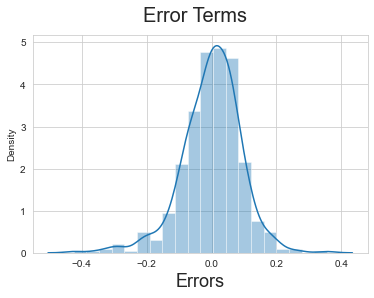

In [61]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18) 

#### Since the errors terms are normally distributed with mean=0, thus our assumption is satisfied in our model.

### Making Predictions

#### Applying the scaling on the test set also

In [62]:
# Applying Scaling on the continuous columns : 'windspeed' , 'temp' , 'humidity'
vars = ['windspeed' , 'temp' , 'humidity','count']

bikes_test[vars] = scaler.transform(bikes_test[vars])

#### Dividing into X_test and y_test

In [63]:
y_test = bikes_test.pop('count')
X_test = bikes_test

In [64]:
# Using our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [65]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

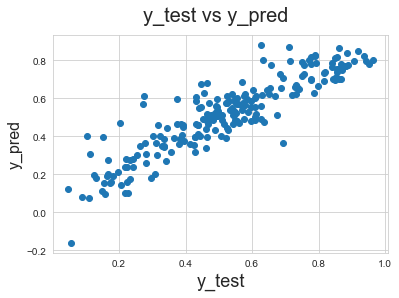

In [66]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

The predicted values have a linear relationship with actual values.

#### Calculating R-squared value for Test set

In [67]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
r2

0.8036570309481511

#### Calculating Adj. R-squared value for Test set

In [68]:
n = X_test_new.shape[0]      # n is number of rows in X_test_new

p = X_test_new.shape[1]     # p= Number of features/predictors which is number of columns in X_test_new

# Calculating Adjusted R-squared value using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7922195764402764

In [69]:
# calculating the Mean Squared Error , Root Mean Squared Error and Mean Absolute error
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.07238118820399701
MSE: 0.009325467989743636
RMSE: 0.09656846270777865


#### Comparison between the results on Train and Test datasets:
- R-squared Value:
    - Train set : 83.5%
    - Test set : 80.3%
    
    
    
- Adj R-squared Value:
   - Train set :  83.1%
   - Test set : 79.2%


As we can see that the **difference between the R-squared value for the train and test dataset is not more than 5% , therefore we can say that this is a good model.**

As we can see that the **difference between the Adj R-squared value for the train and test dataset is not more than 5% , therefore we can say that this is a good model.**

### Reporting the Final Model:


**From the coefficients that we get for the variables, our `linear regression equation` becomes:**

**Count**=0.2657 +	0.4335 * *`temp`* - 0.0977 * *`holiday`* - 0.1482 * *`windspeed`* - 0.0427 * *`month_Jan`* - 0.0693 * *`month_Jul`* + 0.0587 *  *`month_Sep`* - 0.1013 * *`season_spring`* + 0.0432  * *`season_winter`* - 0.2877 * *`weather_light rain & snow`* -0.0802 * *`weather_mist & cloudy`* + 0.2348 * *`year_2019`*

From the regression model above , we have the following variables and their coefficients which are significant in predicting the demand for shared bikes:

- temp = 0.4335
- holiday = -0.0977
- windspeed = -0.1482
- month_Jan = -0.0427  
- month_Jul = -0.0693
- month_Sep = 0.0587 
- season_spring = -0.1013
- season_winter = 0.0432
- weather_light rain & snow = -0.2877
- weather_mist & cloudy = -0.0802
- year_2019 = 0.2348

#### The three most significant variables affecting the demand for shared bikes are :

- **temperature**
- **year**
- **month September**

as these features are having positive coefficients and an increase in them is going to result into an increase in the demand for shared bikes .